In [1]:
# !pip install shapely

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import shapely
from shapely import Point

c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


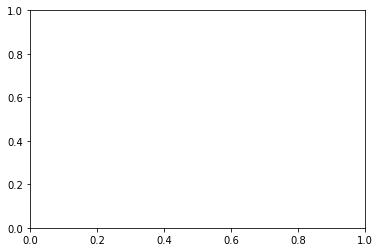

In [3]:
fig, ax = plt.subplots()

3.1365484905459393


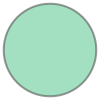

In [5]:
## shapely 모듈에는 원을 직접생성하는 메서드가 없고, buffer 메소드를 통해 간접적으로 원을 생성하고 계산합니다.
## 지오메트리의 버퍼는 반지름이 버퍼 거리의 절대값과 같은 원인 지오메트리의 민코프스키 합(또는 음의 거리에 대한 차이)으로 정의됩니다.
## 때문에 버퍼 작업은 항상 다각형 결과를 반환합니다. 다만 버퍼 생성시, quad_segs 인자를 입력함으로써 계산의 정확도를 늘릴 수 있습니다.

circle0 = Point(1,1).buffer(1) # quad_segs=8
print(circle0.area)
circle0

3.1415874858795703


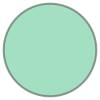

In [6]:
circle1 = Point(1,1).buffer(1, quad_segs=500) # quad_segs값 직접 입력 - 테스트 결과 대략 500각형 정도면 소수점 4째 자리까지 정확도가 확보되는 것으로 보입니다.
print(circle1.area)
circle1

4.0


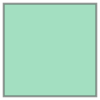

In [7]:
geoms = np.array([Point(0, 0), Point(1, 1), Point(2, 2)])
rectangle1 = shapely.box(0, 0, 2, 2)
print(rectangle1.area)
rectangle1

15.136548490545945


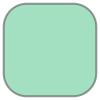

In [23]:
brec = rectangle1.buffer(1)
print(brec.area)
brec

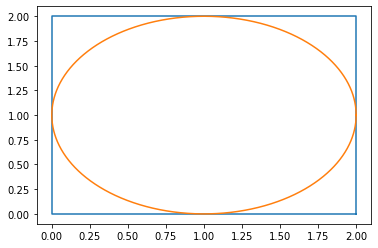

In [9]:
plt.plot(*rectangle1.exterior.xy)
plt.plot(*circle1.exterior.xy)

3.141587485879572


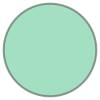

In [10]:
교차영역 = shapely.intersection(rectangle1,circle1)
print(교차영역.area)
교차영역

0.8584125141204363


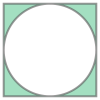

In [11]:
차집합영역 = shapely.difference(rectangle1,circle1)
print(차집합영역.area)
차집합영역